<a href="https://colab.research.google.com/github/LeeYeonGeol/ML_DL_Practice/blob/main/Fashion_MNIST_%EC%97%B0%EC%8A%B5_(Dense_Layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data


In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("train dataset shape: ", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


## MNIST image array 시각화

Text(0.5, 1.0, '9')

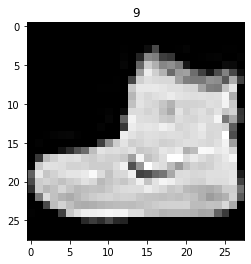

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [24]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

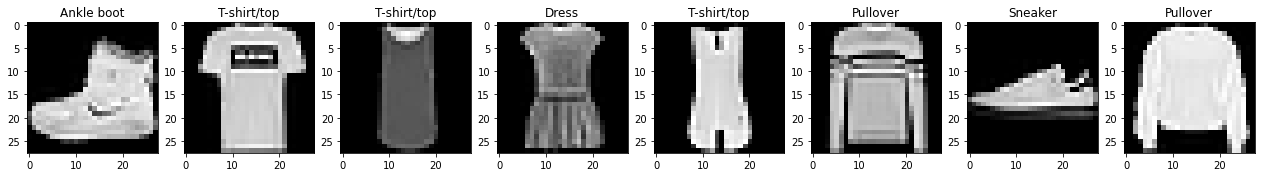

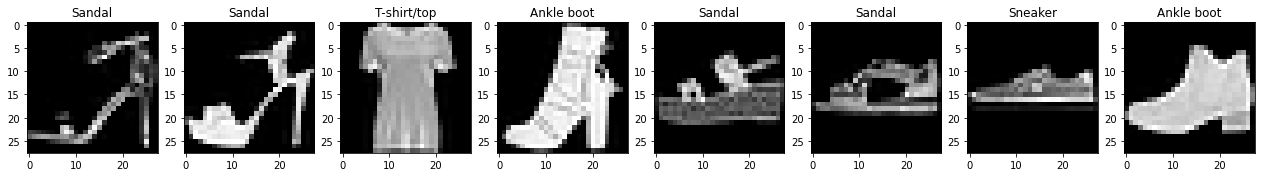

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',' Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22, 6), nrows= 1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

# 데이터 전처리 함수 생성
- 0 ~ 255 사이의 픽셀값을 - ~ 1 사이 값으로 변환한다. 


In [26]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# 피처 정규화
def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

# 원-핫 인코딩
def get_preprocessed_ohe(images, labels):
  images, labels = get_preprocessed_data(images, labels)
  oh_labels = to_categorical(labels)
  return images, oh_labels

# OHE 적용 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
  
  train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
  test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

  tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

  return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

# Dense Layer를 기반으로 모델 생성

In [27]:
INPUT_SIZE = 28
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

def create_model():
  input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
  x = Flatten()(input_tensor)
  x = Dense(100, activation='relu')(x)
  x = Dense(30, activation='relu')(x)
  output = Dense(10, activation='softmax')(x)

  model = Model(inputs=input_tensor, outputs = output)
  return model

model = create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


# fashion MNIST 데이터 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성.

In [28]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
  get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


# 모델 생성 및 optimizer, loss, metric 적용


In [29]:
from tensorflow.keras.optimizers import Adam
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


# 학습 수행

In [30]:
history = model.fit(x=tr_images, y = tr_oh_labels, batch_size=128, epochs=20, validation_data= (val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.8640 - accuracy: 0.7116 - val_loss: 0.4507 - val_accuracy: 0.8439
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4192 - accuracy: 0.8517 - val_loss: 0.3931 - val_accuracy: 0.8547
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3667 - accuracy: 0.8695 - val_loss: 0.3953 - val_accuracy: 0.8563
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3495 - accuracy: 0.8751 - val_loss: 0.3531 - val_accuracy: 0.8737
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.8840 - val_loss: 0.3418 - val_accuracy: 0.8739
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3054 - accuracy: 0.8896 - val_loss: 0.3567 - val_accuracy: 0.8733
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2930 - accuracy: 0.8935 - val_loss: 0.3406 - val_accuracy: 0.8793
Epoch 

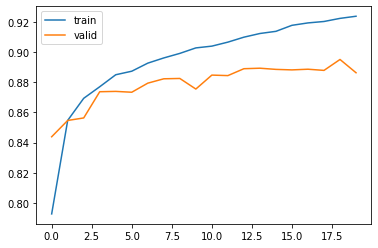

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.legend()

show_history(history)

# 모델 성능 검증

In [35]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8772


[0.3621464967727661, 0.8772000074386597]